<a href="https://colab.research.google.com/github/davidmertenjones/Thinkful_DSB_Unit_4/blob/master/DSB_4_2_5_Challenge_BostonMarathon_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

try:
  df = pd.read_csv('/content/drive/Colab Notebooks/results2014.csv')
except:
  !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
  !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
  !apt-get update -qq 2>&1 > /dev/null
  !apt-get -y install -qq google-drive-ocamlfuse fuse


  from google.colab import auth
  auth.authenticate_user()
  from oauth2client.client import GoogleCredentials
  creds = GoogleCredentials.get_application_default()
  import getpass
  !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
  vcode = getpass.getpass()
  !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

  !mkdir -p drive
  !google-drive-ocamlfuse drive

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, SpectralClustering, DBSCAN

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 12, 8

# Boston Marathon 2014

In [0]:
df = pd.read_csv('/content/drive/Colab Notebooks/results2014.csv')

In [4]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
columnlist = df.columns.tolist()

columnlist

['10k',
 'name',
 'division',
 '25k',
 'gender',
 'age',
 'official',
 'bib',
 'genderdiv',
 'ctz',
 '35k',
 'overall',
 'pace',
 'state',
 '30k',
 '5k',
 'half',
 '20k',
 'country',
 'city',
 '40k']

In [6]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [7]:
df.sort_values(by='official')

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
16,17.13,"Madera, Jordi",5,47.45,M,34,84.70,W9,5,NaN,...,5,3.23,NaN,58.73,8.02,39.12,36.98,ESP,Les Franquesas,79.92
30,18.75,"George, Joshua",6,49.15,M,30,84.82,W15,6,NaN,...,6,3.25,IL,59.92,8.93,41.18,39.08,USA,Champaign,80.18
18,18.17,"Hamerlak, Tomasz",7,49.15,M,38,84.88,W10,7,NaN,...,7,3.25,NaN,59.92,8.67,41.20,39.05,POL,Bystra,80.18
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
40,17.67,"Senbeta, James",9,48.55,M,27,85.38,W19,9,NaN,...,9,3.27,IL,59.77,8.38,40.45,38.33,USA,Champaign,80.62
58,18.77,"Tana, Rawat",10,49.75,M,36,86.90,W26,10,NaN,...,10,3.32,NaN,61.17,8.98,41.52,39.37,THA,Bangkok,82.18


"Official" seems a little unusual... the record held for fastest Boston Marathon time was set in 2011 by Geoffrey Mutai, clocking in at 123 minutes, 2 seconds, yet the shortest time in our dataframe is just over 80 minutes. Something else is going on here.

In [8]:
df[df.overall == 1]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
39,30.48,"Keflezighi, Meb",1,76.00,M,38,128.62,19,1,NaN,...,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82


There are two 1st-place overall finishers, Meb Keflezighi and Ernst F. Van Dyk. The BAA website shows that these are for the [runner division and wheelchair division](http://registration.baa.org/cfm_Archive/iframe_ArchiveSearch.cfm?mode=topfinishers&snap=49080546&), respectively. As Mr. Keflezighi's time was 2:08:37, this corroborates with the information from our dataset.

Note: the "W" on the bib refers to "wheelchair." This changes how we'll look at our data going forward.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/London_Marathon_2015.jpg/1280px-London_Marathon_2015.jpg)

Ernst Van Dyk, #23, London Marathon 2015 (source: Wikipedia.org)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [10]:
for column in df.columns:
    print(column, '\n', df[column].value_counts(), '\n')

10k 
 -        50
48.38    47
48.97    47
48.75    42
48.02    42
48.87    41
47.62    41
49.42    41
48.30    40
48.95    40
47.88    40
49.47    39
47.20    38
48.28    38
48.17    37
49.30    37
48.65    37
47.13    37
49.88    37
48.03    37
48.25    36
49.03    36
50.05    36
47.80    36
47.95    36
48.08    36
49.02    36
49.73    36
49.32    36
42.35    36
         ..
69.08     1
68.72     1
75.33     1
86.88     1
34.42     1
77.22     1
81.32     1
81.98     1
21.55     1
77.87     1
35.53     1
32.77     1
20.55     1
73.52     1
81.38     1
35.73     1
74.30     1
80.45     1
34.07     1
35.38     1
77.20     1
83.13     1
32.92     1
80.67     1
73.38     1
78.60     1
85.03     1
20.68     1
33.62     1
67.73     1
Name: 10k, Length: 2766, dtype: int64 

name 
 Lee, Kerry                 2
Murphy, Brian P.           2
Brown, Amanda              2
Stone, Jim                 2
Schroeder, Steve           2
Sherman, Bonnie            2
Williams, Andrew           2
Riley, Micha

In [0]:
for column in (set(df.columns.tolist()) - set(['name'])):
    df[column] = df[column].replace('-',0)

In [0]:
distances = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']

In [0]:
for distance in distances:
    df[distance] = df[distance].apply(lambda x: float(x))

In [0]:
df['gender'] = df['gender'].replace({'M':0, 'F':1})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null float64
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null float64
gender       31984 non-null int64
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null float64
5k           31984 non-null float64
half         31984 non-null float64
20k          31984 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null float64
dtypes: float64(10), int64(5), object(6)
memory usage: 5.1+ MB


In [16]:
for column in df.columns:
    print(column, np.round((len(df) - len(df[df[column].isnull()]))/ len(df), 2))

10k 1.0
name 1.0
division 1.0
25k 1.0
gender 1.0
age 1.0
official 1.0
bib 1.0
genderdiv 1.0
ctz 0.04
35k 1.0
overall 1.0
pace 1.0
state 0.92
30k 1.0
5k 1.0
half 1.0
20k 1.0
country 1.0
city 1.0
40k 1.0


In [0]:
numericals = ['10k', 'division', '25k', 'gender', 'age', 'official',
             'genderdiv', '35k', 'overall', 'pace', '30k', '5k',
             'half', '20k', '40k']

categoricals = ['name', 'bib', 'country', 'city']

In [0]:
def plotcolumn(column, dataframe):
    
    """Plot different transforms for a column in a dataframe"""
    
    plt.rcParams['figure.figsize'] = 15, 9
    fig = plt.figure()

    fig.add_subplot(231)
    sns.distplot(dataframe[column])
    plt.title('{} Raw'.format(column))

    fig.add_subplot(232)
    sns.distplot(np.log(dataframe[column]+1))
    plt.title('{} Log'.format(column))

    fig.add_subplot(233)
    sns.distplot((dataframe[column])**2)
    plt.title('{} Square'.format(column))
    
    fig.add_subplot(235)
    sns.distplot(np.sqrt(dataframe[column]+1))
    plt.title('{} Square Root'.format(column))
    
    ax3=fig.add_subplot(236)
    sns.distplot(1/(dataframe[column]+1))
    plt.title('{} Inverse'.format(column))
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# EDA

## Distributions of Numerical Data

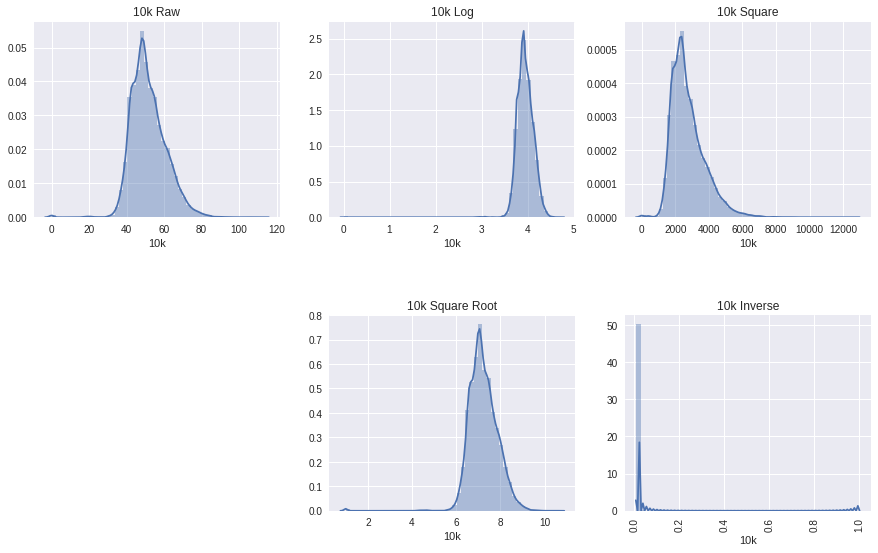

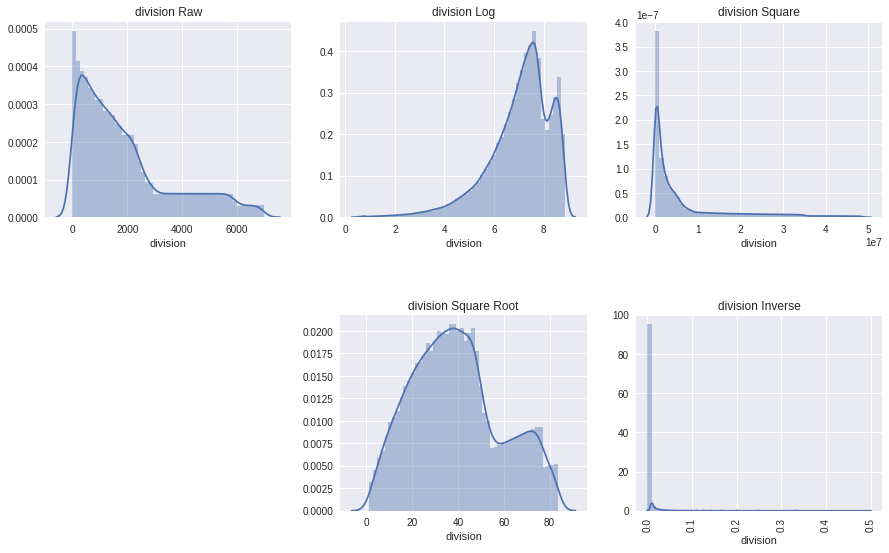

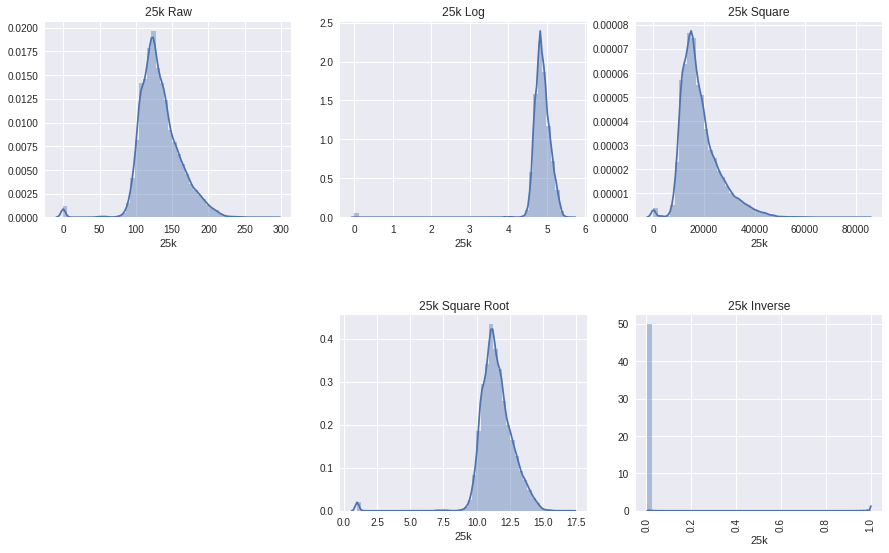

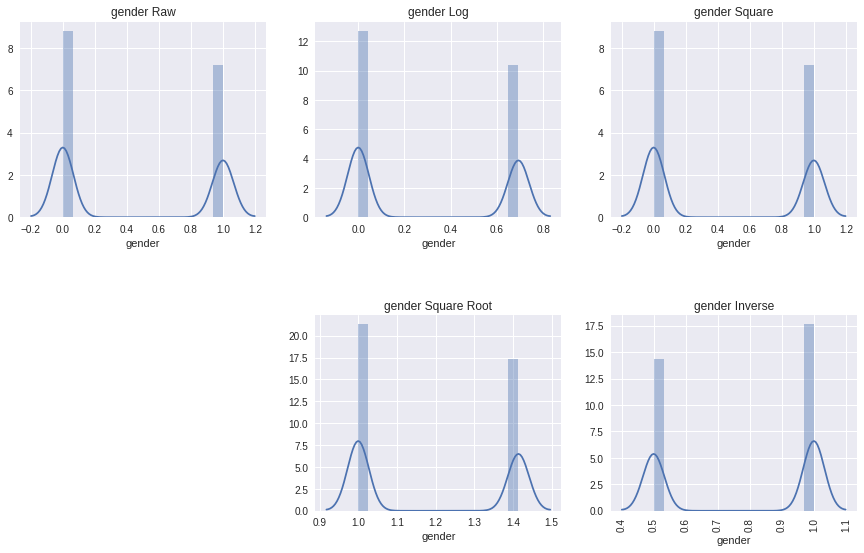

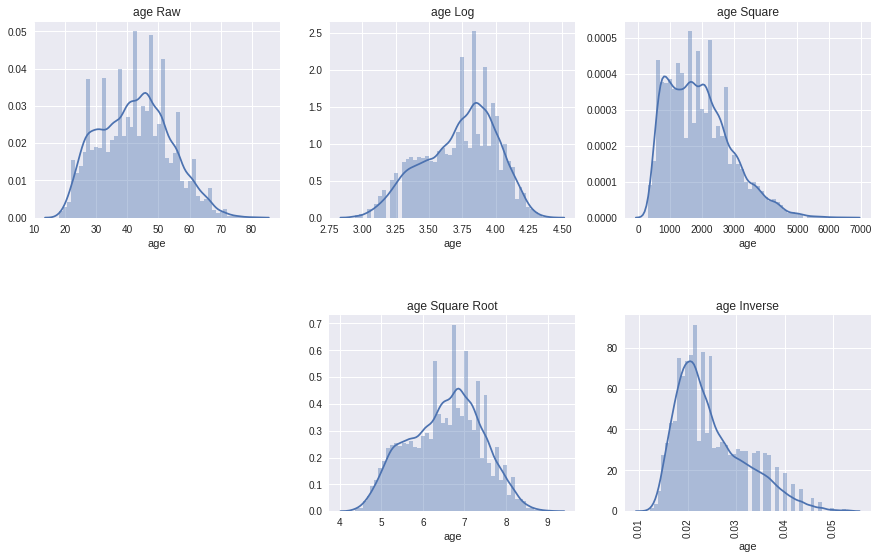

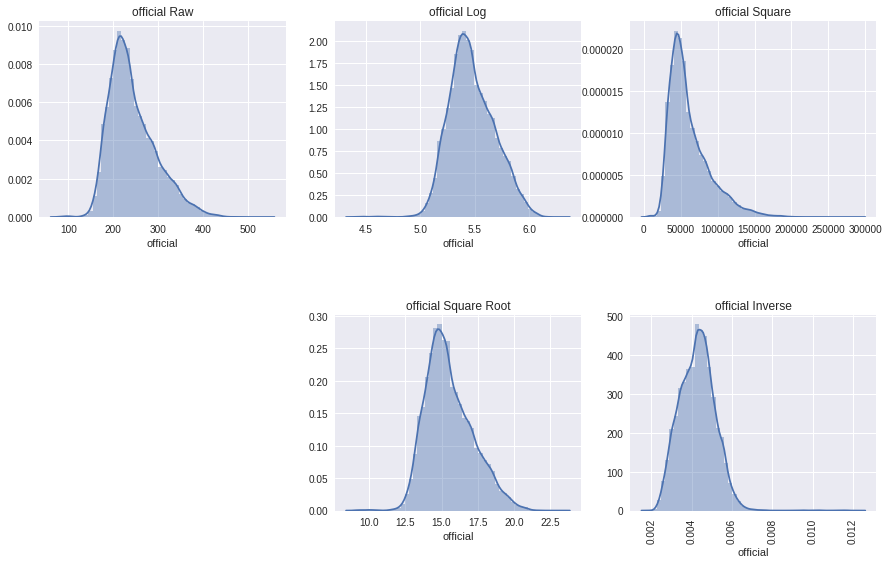

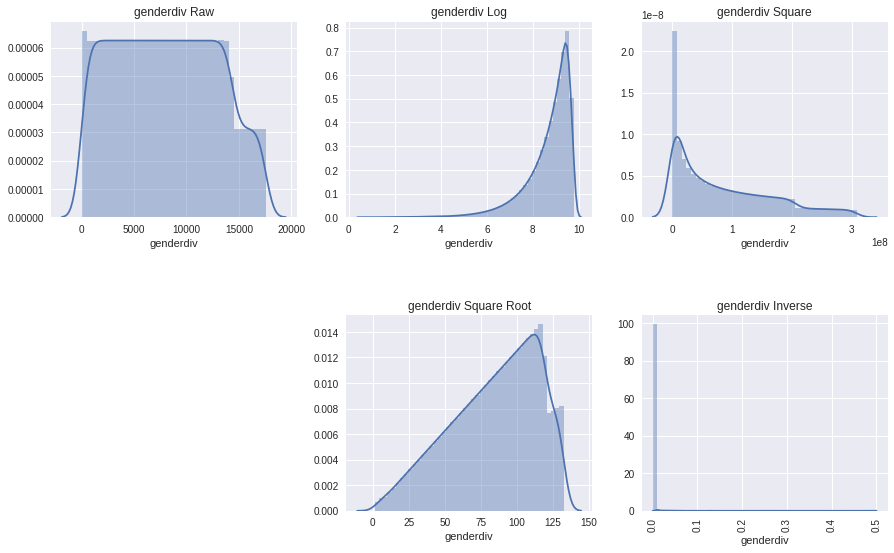

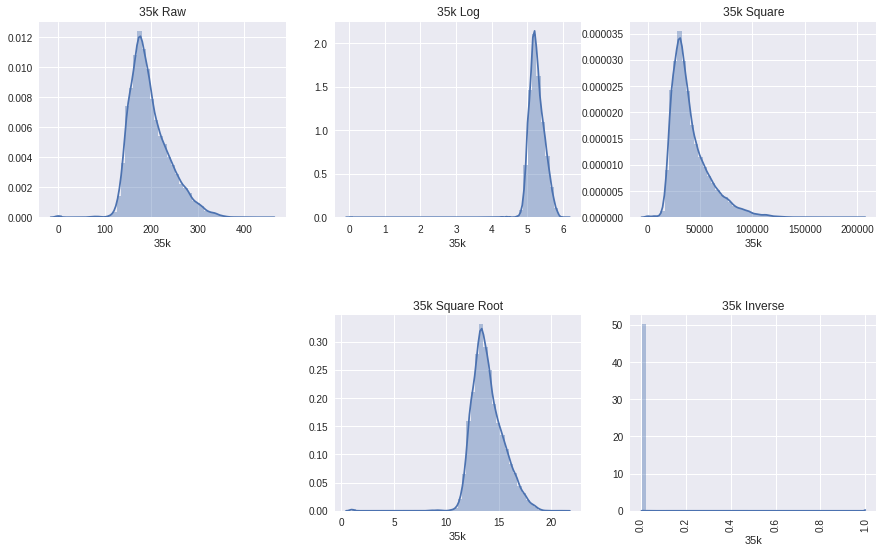

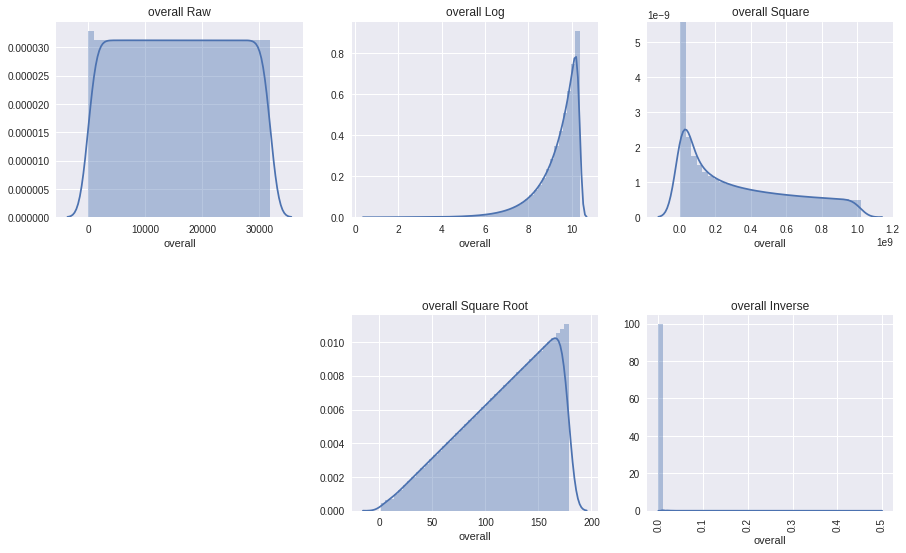

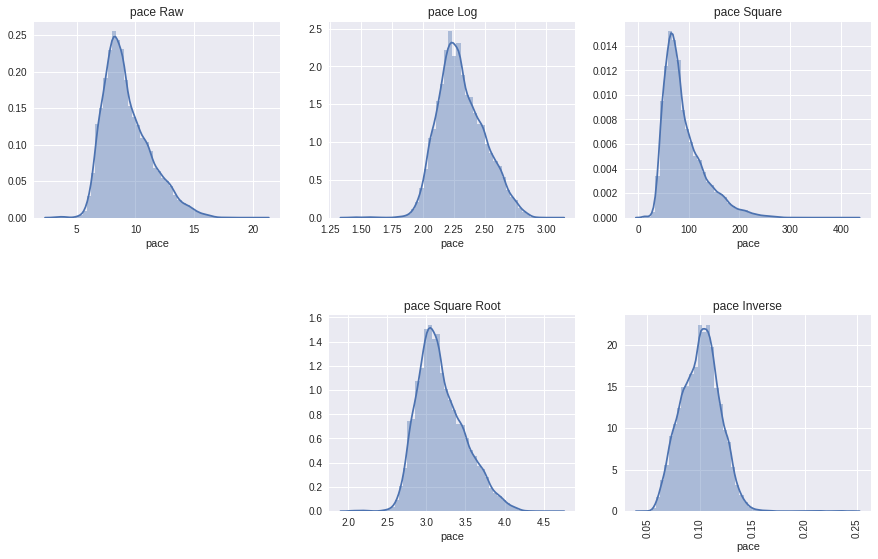

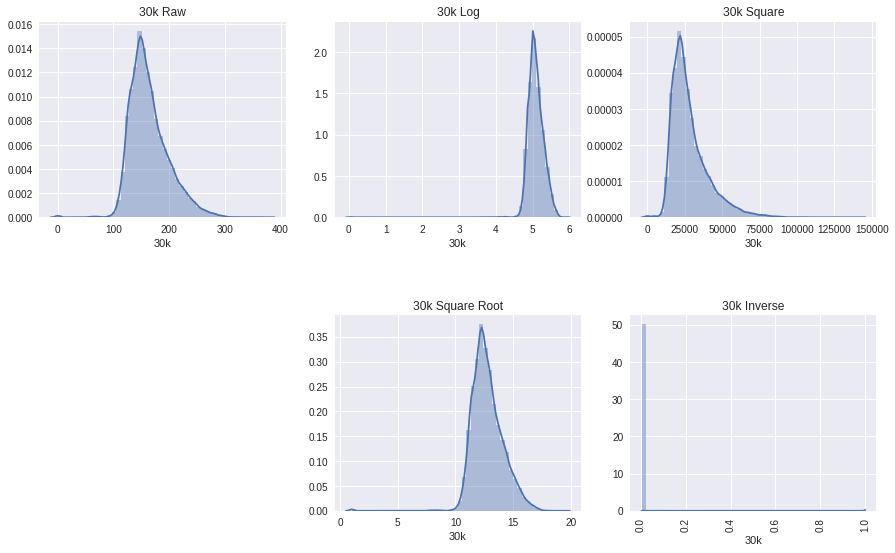

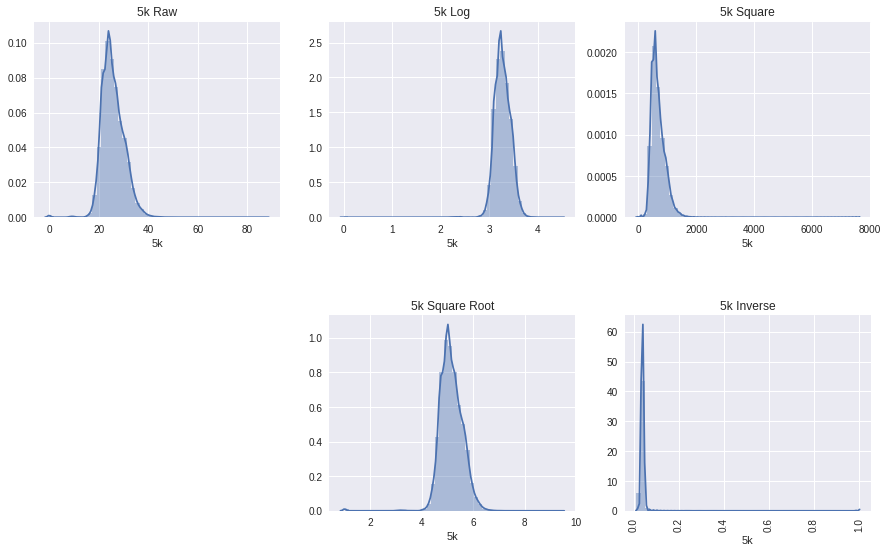

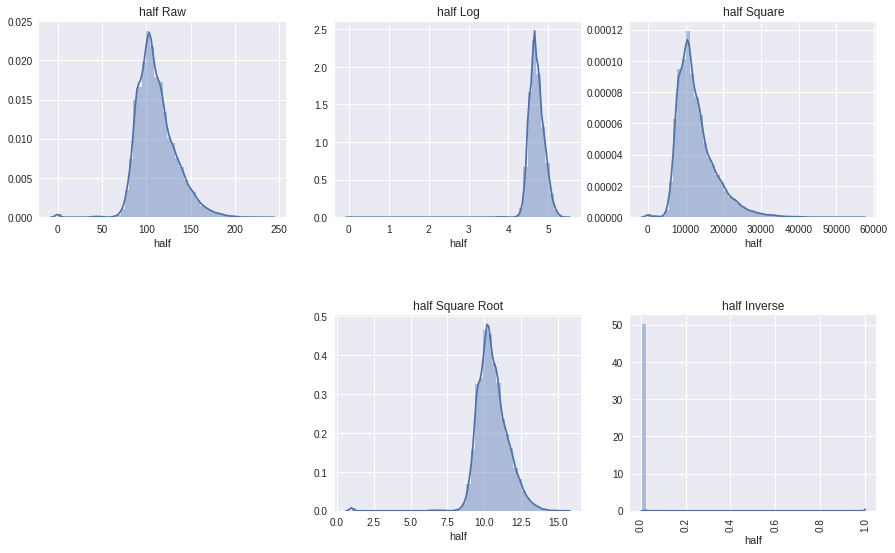

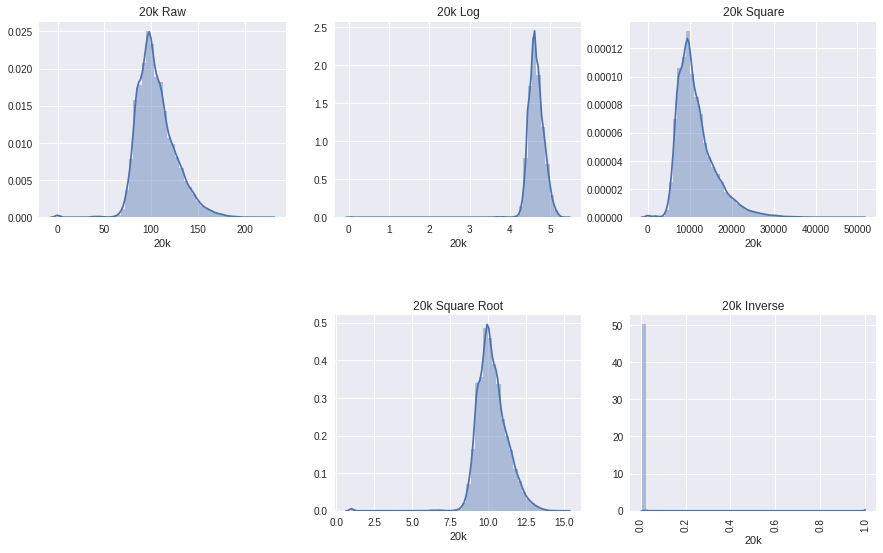

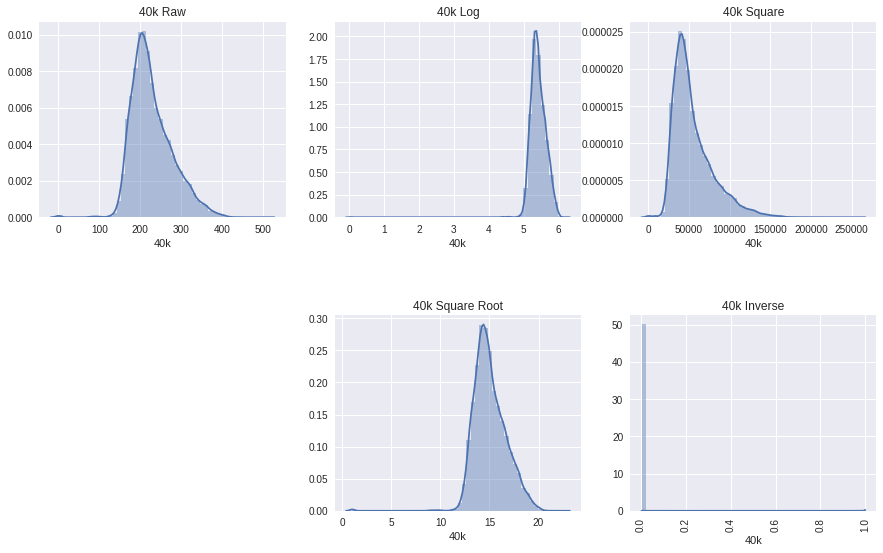

In [19]:
for numericalcolumn in numericals:
    plotcolumn(numericalcolumn, df)

In [20]:
df[df['division'] == 1]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
1,32.58,"Jeptoo, Rita",1,82.43,1,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,0,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
39,30.48,"Keflezighi, Meb",1,76.00,0,38,128.62,19,1,NaN,...,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82
70,21.60,"Sanz, Santiago",1,60.13,0,33,106.20,W32,31,NaN,...,38,4.07,NaN,74.35,10.17,49.93,47.28,ESP,Albatera,100.28
114,32.63,"Steidl, Ulrich",1,82.20,0,42,139.80,77,22,NaN,...,23,5.33,WA,99.15,16.25,69.18,65.52,USA,Seattle,132.47
115,32.63,"Lokken, Tracy",1,83.90,0,48,144.65,79,40,NaN,...,51,5.53,MI,101.33,16.23,70.32,66.53,USA,Marquette,136.83
124,20.65,"McFadden, Tatyana",1,54.18,1,25,95.10,W101,1,NaN,...,17,3.63,IL,66.48,10.12,45.43,43.12,USA,Champaign,89.87
125,36.48,"Simon, Lidia",1,92.30,1,40,156.78,F102,24,ROU,...,222,5.98,CO,111.57,18.20,77.57,73.50,USA,Boulder,148.90
149,37.82,"Bentley, Lisa",1,96.92,1,45,167.78,F112,41,CAN,...,759,6.40,FL,117.17,18.50,81.62,77.30,USA,Clermont,159.02
390,35.98,"Bennett, Mark",1,90.75,0,53,154.68,390,149,NaN,...,170,5.90,BC,109.57,17.98,76.48,72.53,CAN,Vancouver,146.55


In [21]:
df[df['division'] == 1]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
1,32.58,"Jeptoo, Rita",1,82.43,1,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,0,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
39,30.48,"Keflezighi, Meb",1,76.00,0,38,128.62,19,1,NaN,...,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82
70,21.60,"Sanz, Santiago",1,60.13,0,33,106.20,W32,31,NaN,...,38,4.07,NaN,74.35,10.17,49.93,47.28,ESP,Albatera,100.28
114,32.63,"Steidl, Ulrich",1,82.20,0,42,139.80,77,22,NaN,...,23,5.33,WA,99.15,16.25,69.18,65.52,USA,Seattle,132.47
115,32.63,"Lokken, Tracy",1,83.90,0,48,144.65,79,40,NaN,...,51,5.53,MI,101.33,16.23,70.32,66.53,USA,Marquette,136.83
124,20.65,"McFadden, Tatyana",1,54.18,1,25,95.10,W101,1,NaN,...,17,3.63,IL,66.48,10.12,45.43,43.12,USA,Champaign,89.87
125,36.48,"Simon, Lidia",1,92.30,1,40,156.78,F102,24,ROU,...,222,5.98,CO,111.57,18.20,77.57,73.50,USA,Boulder,148.90
149,37.82,"Bentley, Lisa",1,96.92,1,45,167.78,F112,41,CAN,...,759,6.40,FL,117.17,18.50,81.62,77.30,USA,Clermont,159.02
390,35.98,"Bennett, Mark",1,90.75,0,53,154.68,390,149,NaN,...,170,5.90,BC,109.57,17.98,76.48,72.53,CAN,Vancouver,146.55


In [22]:
df['country'].value_counts()/len(df)

USA    0.851457
CAN    0.068003
GBR    0.010818
ITA    0.006628
MEX    0.006409
GER    0.005690
JPN    0.005471
AUS    0.003877
IRL    0.003721
FRA    0.003596
ESP    0.002783
BRA    0.002720
SWE    0.002064
SUI    0.001938
KOR    0.001876
NED    0.001688
HKG    0.001657
DEN    0.001563
CHN    0.001313
COL    0.001251
CHI    0.000907
ISL    0.000875
FIN    0.000875
BEL    0.000844
SIN    0.000719
AUT    0.000688
NOR    0.000657
RSA    0.000594
VEN    0.000594
BER    0.000563
         ...   
TUR    0.000125
CZE    0.000125
SVK    0.000125
MAS    0.000125
PAN    0.000094
DOM    0.000094
ECU    0.000094
HUN    0.000094
UKR    0.000094
ROU    0.000063
QAT    0.000063
THA    0.000063
BAH    0.000063
EGY    0.000063
ESA    0.000063
LIE    0.000031
MAR    0.000031
TAN    0.000031
BAR    0.000031
BOL    0.000031
BLR    0.000031
ZIM    0.000031
URU    0.000031
VGB    0.000031
BRN    0.000031
TRI    0.000031
CRO    0.000031
EST    0.000031
CAY    0.000031
INA    0.000031
Name: country, Length: 7

In [0]:
df['state'] = df['state'].fillna('')

In [0]:
df['country_(state)'] = df['country'] + '_' + df['state']

In [25]:
df[df['genderdiv'] == 1]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,pace,state,30k,5k,half,20k,country,city,40k,country_(state)
1,32.58,"Jeptoo, Rita",1,82.43,1,33,138.95,F1,1,NaN,...,5.30,,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,KEN_
2,16.62,"Van Dyk, Ernst F.",1,45.80,0,41,80.60,W2,1,NaN,...,3.08,,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,RSA_
39,30.48,"Keflezighi, Meb",1,76.00,0,38,128.62,19,1,NaN,...,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82,USA_CA
124,20.65,"McFadden, Tatyana",1,54.18,1,25,95.10,W101,1,NaN,...,3.63,IL,66.48,10.12,45.43,43.12,USA,Champaign,89.87,USA_IL


In [0]:
def matchstring(x, y):
    """Return 1 if word y is in string x, else return 0"""
    match = 0
    if type(y) == str:
        if y in x:
            match = 1
    elif type(y) == list:
        for item in y:
            if item in x:
                match = 1
    return match

In [0]:
df['wheelchair'] = df['bib'].apply(lambda x: matchstring(x, 'W'))

In [0]:
df['m_run'] = np.where(((df['gender'] == 0) & (df['wheelchair'] == 0)), 1, 0)
df['w_run'] = np.where(((df['gender'] == 1) & (df['wheelchair'] == 0)), 1, 0)
df['m_wheel'] = np.where(((df['gender'] == 0) & (df['wheelchair'] == 1)), 1, 0)
df['w_wheel'] = np.where(((df['gender'] == 1) & (df['wheelchair'] == 1)), 1, 0)

df['m_run_rank'] = df['m_run'] * df['genderdiv']
df['w_run_rank'] = df['w_run'] * df['genderdiv']
df['m_wheel_rank'] = df['m_wheel'] * df['genderdiv']
df['w_wheel_rank'] = df['w_wheel'] * df['genderdiv']

df['div_type'] = df['m_run'] + df['w_run'] * 2 + df['m_wheel'] * 3 + df['w_wheel'] * 4

In [29]:
df['div_type'].value_counts()

1    17575
2    14356
3       42
4       11
Name: div_type, dtype: int64

In [30]:
df['age'].describe()

count    31984.000000
mean        42.407079
std         11.316496
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64

In [0]:
df['age_cat'] = df['age'] // 10  

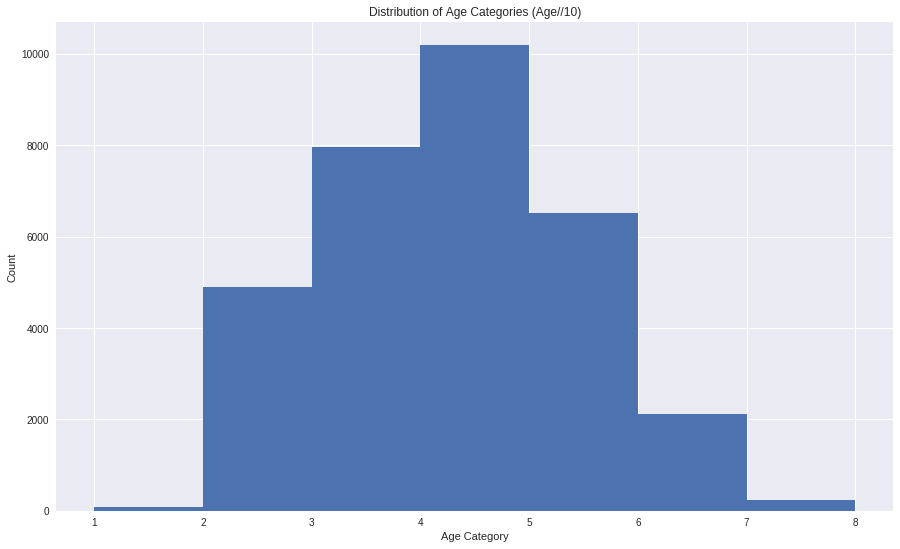

In [32]:
plt.title('Distribution of Age Categories (Age//10)')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.hist(df['age_cat'], bins=7)
plt.show()

In [0]:
df['distances_mean'] = df[distances].mean(axis=1)

In [34]:
df['distances_mean'].describe()

count    31984.000000
mean       127.104250
std         25.102605
min          8.293750
25%        109.240000
50%        122.345000
75%        141.770938
max        276.815000
Name: distances_mean, dtype: float64

In [0]:
def distance_quartiles(x):
  category = 0
  if x <= 109.24:
    pass
  elif x <= 122.345:
    category = 1
  elif x <= 141.770938:
    category = 2
  else:
    category = 3
  return category

In [0]:
df['distance_quartile'] = df['distances_mean'].apply(lambda x: distance_quartiles(x))

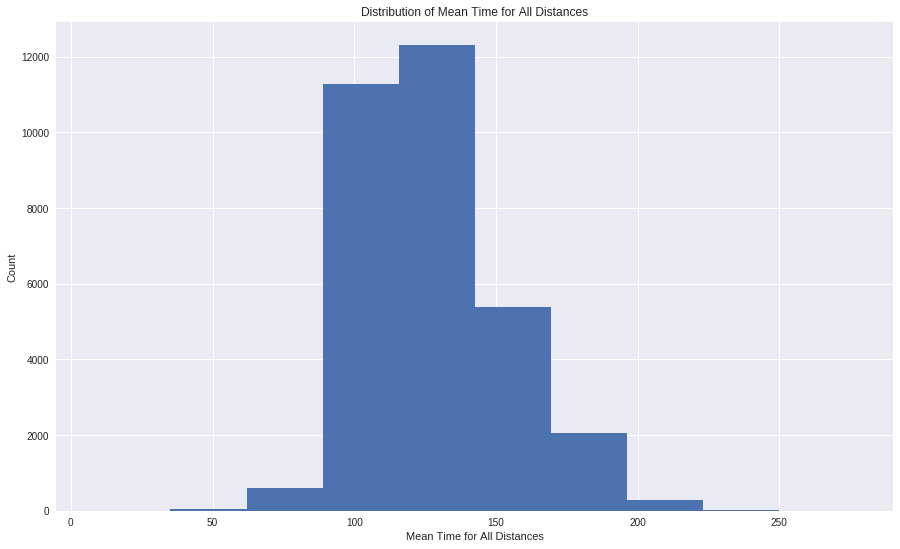

In [37]:
plt.title('Distribution of Mean Time for All Distances')
plt.xlabel('Mean Time for All Distances')
plt.ylabel('Count')
plt.hist(df['distances_mean'])
plt.show()

In [0]:
features = df[['10k', 'division', '25k', 'gender', 'age', 'official',
               'genderdiv', '35k', 'overall', 'pace', '30k', '5k', 'half',
               '20k', 'country_(state)', '40k']]

In [39]:
features.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,country_(state),40k
0,17.37,8,47.67,0,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN_,80.43
1,32.58,1,82.43,1,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN_,132.10
2,16.62,1,45.80,0,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA_,76.10
3,32.57,3,82.43,1,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH_,132.95
4,17.12,2,46.37,0,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN_,76.72


### Pairs Plot

In [0]:
show_pairplot = False

if show_pairplot == True:

  sns.pairplot(features)

  plt.show()

### Features for Clustering

In [41]:
features['country_(state)'].value_counts()/len(features)

USA_MA    0.237212
USA_CA    0.072724
USA_NY    0.048556
CAN_ON    0.032891
USA_PA    0.031297
USA_TX    0.031016
USA_IL    0.028639
USA_OH    0.023762
USA_FL    0.023449
USA_VA    0.022292
USA_MI    0.021730
USA_NC    0.019322
USA_WA    0.018634
USA_CO    0.018072
USA_NJ    0.017790
USA_MN    0.017384
USA_MD    0.016477
USA_NH    0.016446
USA_CT    0.016289
USA_GA    0.013851
USA_WI    0.013538
USA_UT    0.013475
CAN_QC    0.013100
USA_OR    0.012694
GBR_      0.010818
USA_AZ    0.009942
USA_IN    0.009098
USA_TN    0.008160
USA_MO    0.008004
USA_ME    0.007816
            ...   
UKR_      0.000094
HUN_      0.000094
DOM_      0.000094
PAN_      0.000094
CAN_NT    0.000094
ECU_      0.000094
EGY_      0.000063
BAH_      0.000063
ROU_      0.000063
QAT_      0.000063
THA_      0.000063
ESA_      0.000063
USA_AP    0.000031
VGB_      0.000031
INA_      0.000031
BLR_      0.000031
LIE_      0.000031
CRO_      0.000031
TAN_      0.000031
CAY_      0.000031
BRN_      0.000031
URU_      0.

In [0]:
features2 = pd.get_dummies(features)

In [43]:
features2.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,...,country_(state)_USA_UT,country_(state)_USA_VA,country_(state)_USA_VT,country_(state)_USA_WA,country_(state)_USA_WI,country_(state)_USA_WV,country_(state)_USA_WY,country_(state)_VEN_,country_(state)_VGB_,country_(state)_ZIM_
0,17.37,8,47.67,0,47,85.25,8,71.40,8,3.27,...,0,0,0,0,0,0,0,0,0,0
1,32.58,1,82.43,1,33,138.95,1,116.37,21,5.30,...,0,0,0,0,0,0,0,0,0,0
2,16.62,1,45.80,0,41,80.60,1,67.42,1,3.08,...,0,0,0,0,0,0,0,0,0,0
3,32.57,3,82.43,1,24,140.58,3,116.37,27,5.37,...,0,0,0,0,0,0,0,0,0,0
4,17.12,2,46.37,0,40,81.23,2,67.83,2,3.10,...,0,0,0,0,0,0,0,0,0,0


# Clustering

In [0]:
X = features.drop(['country_(state)'], 1)

X_norm = normalize(X)

X_pca = PCA(2).fit_transform(X_norm)

## K-Means

No handles with labels found to put in legend.


2-means clustering:


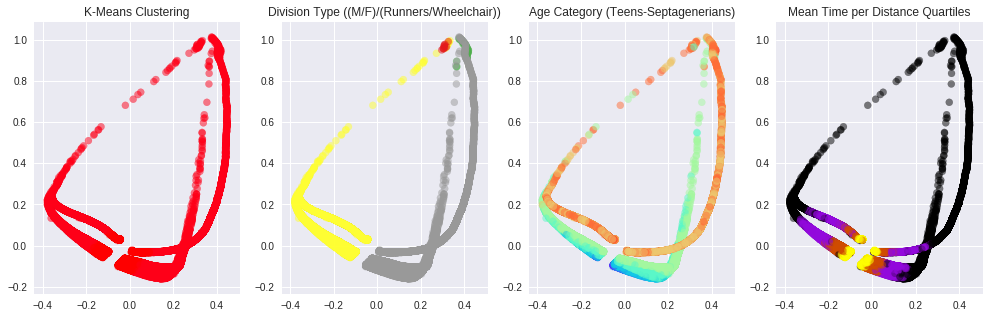

No handles with labels found to put in legend.


3-means clustering:


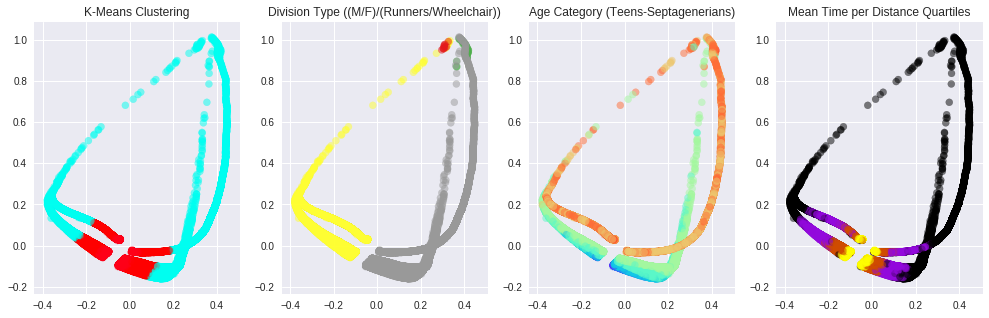

No handles with labels found to put in legend.


4-means clustering:


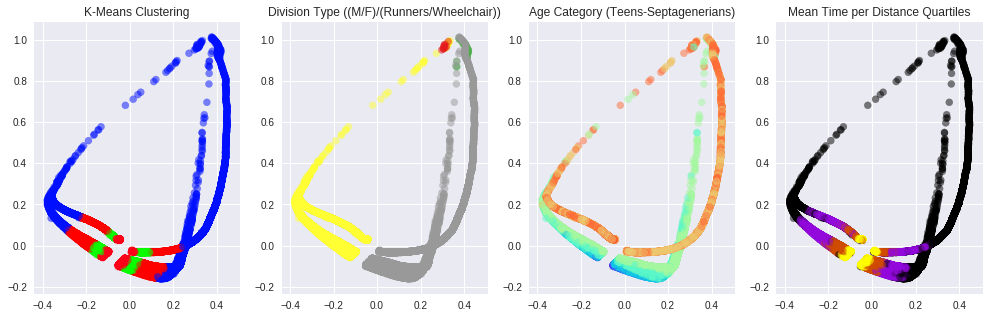

No handles with labels found to put in legend.


5-means clustering:


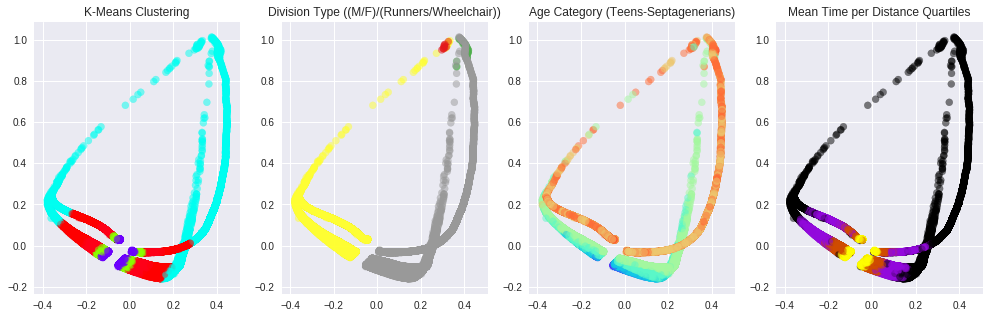

No handles with labels found to put in legend.


6-means clustering:


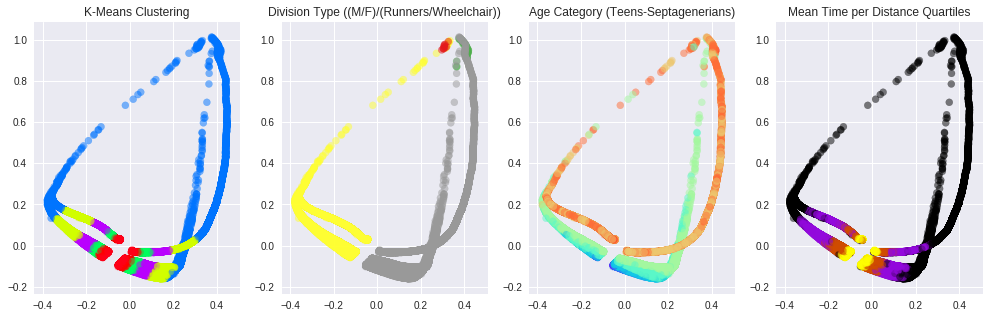

7-means clustering:


No handles with labels found to put in legend.


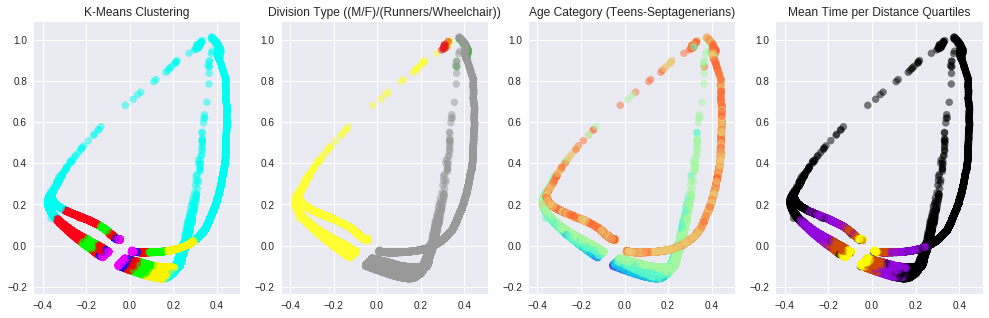

No handles with labels found to put in legend.


8-means clustering:


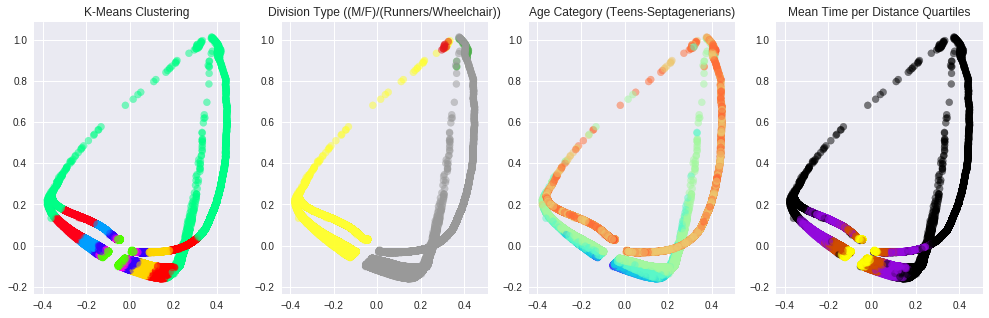

In [48]:
plt.rcParams['figure.figsize'] = 17, 5

for n in [2, 3, 4, 5, 6, 7, 8]:
  km = KMeans(n_clusters=n)
  km.fit(X)
  y_pred = km.predict(X)
  colors = df['div_type']
  colors2 = df['age_cat']
  colors3 = df['distance_quartile']
  
  
  print('{}-means clustering:'.format(n))
  
  plt.subplot(141)
  plt.title('K-Means Clustering')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=y_pred, cmap='hsv_r', alpha=0.5)
  plt.legend()
  
  plt.subplot(142)
  plt.title('Division Type ((M/F)/(Runners/Wheelchair))')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors, cmap='Set1_r', alpha=0.5)
  
  plt.subplot(143)
  plt.title('Age Category (Teens-Septagenerians)')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors2, cmap='rainbow_r', alpha=0.5)
  
  plt.subplot(144)
  plt.title('Mean Time per Distance Quartiles')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors3, cmap='gnuplot', alpha=0.5)
  
  plt.show()

  

In [0]:
km = KMeans(n_clusters=4)
km.fit(X)
y_pred = km.predict(X)

features['y_pred'] = y_pred

In [0]:
df['y_pred'] = y_pred

In [56]:
df.groupby('y_pred').mean()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,...,m_wheel,w_wheel,m_run_rank,w_run_rank,m_wheel_rank,w_wheel_rank,div_type,age_cat,distances_mean,distance_quartile
y_pred,,,,,,,,,,,,,,,,,,,,,
0,48.282860,1515.720137,122.886544,0.529038,42.756572,219.273897,5949.851082,177.913132,12124.387822,8.371481,...,0.000000,0.00000,3762.731630,2187.119452,0.000000,0.000000,1.529038,3.827852,116.254124,1.039369
1,63.125563,3318.825559,164.606552,0.479233,43.456486,317.267010,14071.252013,255.541774,27982.308243,12.106342,...,0.000000,0.00000,8090.961406,5980.290607,0.000000,0.000000,1.479233,3.901214,161.765239,2.911565
2,42.252591,898.984294,106.519922,0.244991,37.736458,186.684166,2513.746352,152.443286,4038.792976,7.128464,...,0.005194,0.00136,2273.518551,240.107964,0.111674,0.008162,1.258100,3.325254,100.242765,0.120455
3,53.666145,2049.027616,138.096323,0.545858,45.788954,251.639521,9932.490879,202.961514,20145.321383,9.605956,...,0.000000,0.00000,5317.744363,4614.746516,0.000000,0.000000,1.545858,4.142640,131.502898,1.991006


In [57]:
df['y_pred'].value_counts()

0    8179
2    8086
3    7894
1    7825
Name: y_pred, dtype: int64

In [68]:
crosstab_df = pd.crosstab(df['y_pred'], df['distance_quartile'])

cm = sns.light_palette("green", as_cmap=True)

crosstab_heat = crosstab_df.style.background_gradient(cmap=cm)

crosstab_heat

distance_quartile,0,1,2,3
y_pred,,,,
0,826,6205,1148,0
1,20,10,612,7183
2,7112,974,0,0
3,39,806,6236,813


K-means clearly does not capture the categorical divisions in our dataset (Age, Divisions). It appears to cluster most around time for distances. 4-means is closest to our mean time/distance quartiles. All of the competitors in wheelchairs are in cluster 2 (quartile 0), because their race times are so much shorter than the runners' times.

## DBSCAN

EPS: 0.1:


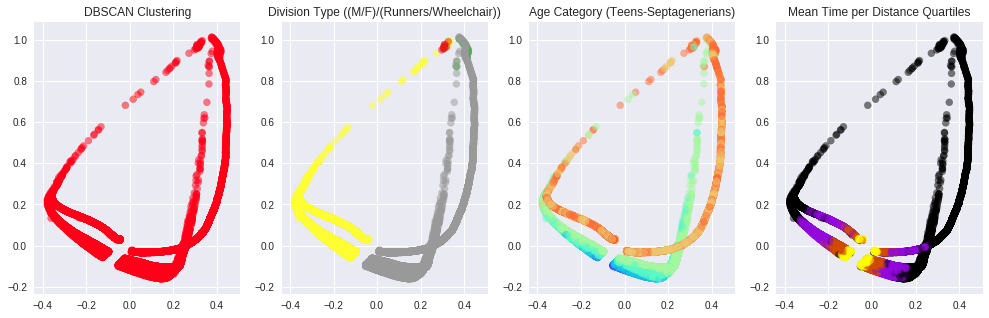

EPS: 0.2:


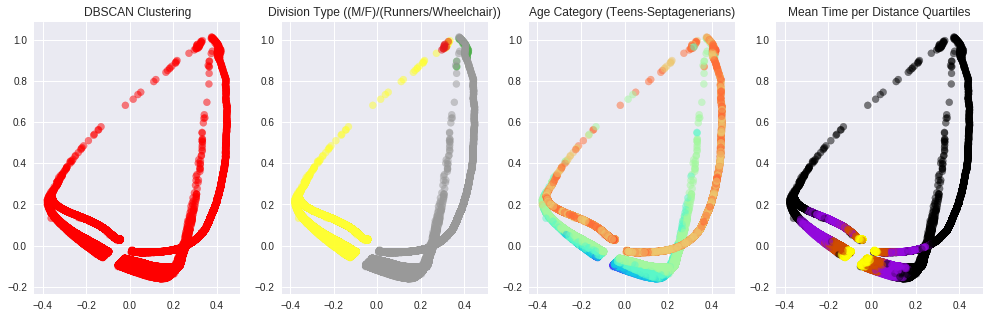

EPS: 0.3:


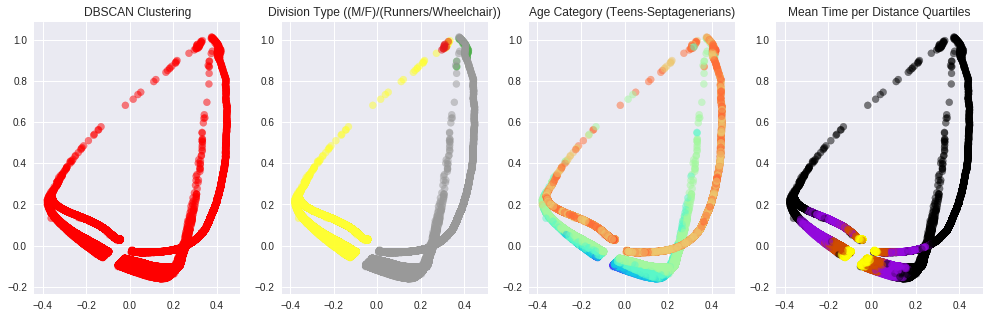

EPS: 0.4:


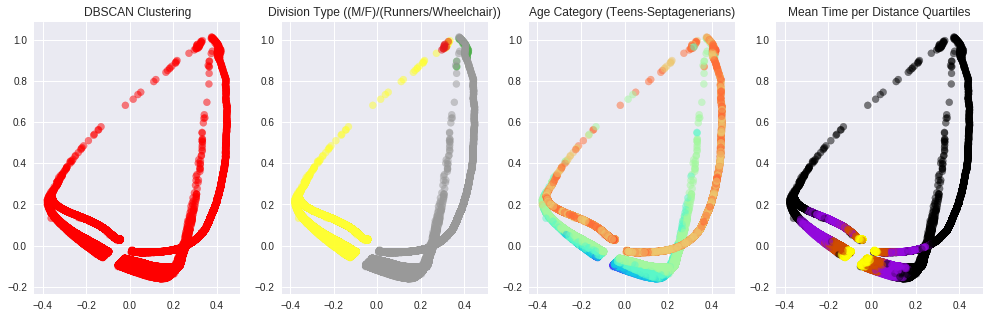

EPS: 0.5:


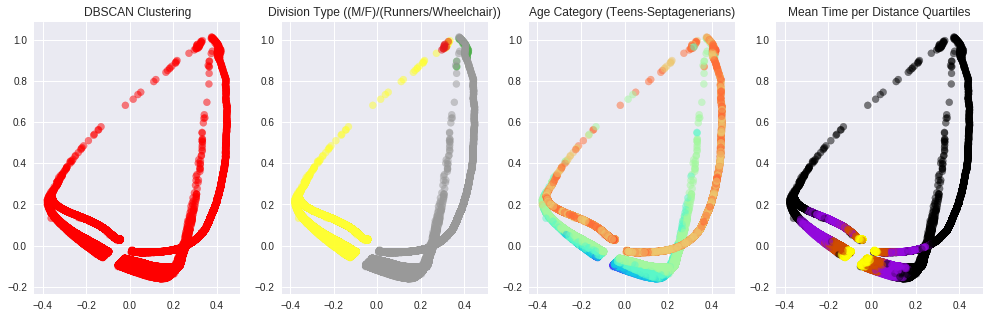

In [46]:
plt.rcParams['figure.figsize'] = 17, 5

for n in [0.1, 0.2, 0.3, 0.4, 0.5]:
  dbscan = DBSCAN(eps=n, algorithm='kd_tree')
  dbscan.fit(X_norm)
  y_pred = dbscan.fit_predict(X_norm)
  colors = df['div_type']
  colors2 = df['age_cat']
  colors3 = df['distance_quartile']
  
  
  print('EPS: {}:'.format(n))
  
  plt.subplot(141)
  plt.title('DBSCAN Clustering')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=y_pred, cmap='hsv', alpha=0.5)
  
  plt.subplot(142)
  plt.title('Division Type ((M/F)/(Runners/Wheelchair))')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors, cmap='Set1_r', alpha=0.5)
  
  plt.subplot(143)
  plt.title('Age Category (Teens-Septagenerians)')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors2, cmap='rainbow_r', alpha=0.5)
  
  plt.subplot(144)
  plt.title('Mean Time per Distance Quartiles')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors3, cmap='gnuplot', alpha=0.5)
  
  plt.show()


DBSCAN failed to differentiate clusters with various configurations of eps, min_distance, and n_clusters.

## Spectral

In [47]:
"""plt.rcParams['figure.figsize'] = 17, 5

for n in [2, 3, 4, 5, 6, 7, 8]:
  spectral = SpectralClustering(n_clusters=n)
  spectral.fit(X)
  y_pred = spectral.fit_predict(X)
  colors = df['div_type']
  colors2 = df['age_cat']
  colors3 = df['distance_quartile']
  
  
  print('Minimum Distance: {}:'.format(n))
  
  plt.subplot(141)
  plt.title('Spectral Clustering')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=y_pred, cmap='hsv', alpha=0.5)
  
  plt.subplot(142)
  plt.title('Division Type ((M/F)/(Runners/Wheelchair))')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors, cmap='Set1_r', alpha=0.5)
  
  plt.subplot(143)
  plt.title('Age Category (Teens-Septagenerians)')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors2, cmap='rainbow_r', alpha=0.5)
  
  plt.subplot(144)
  plt.title('Mean Time per Distance Quartiles')
  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors3, cmap='gnuplot', alpha=0.5)
  
  plt.show()
"""

"plt.rcParams['figure.figsize'] = 17, 5\n\nfor n in [2, 3, 4, 5, 6, 7, 8]:\n  spectral = SpectralClustering(n_clusters=n)\n  spectral.fit(X)\n  y_pred = spectral.fit_predict(X)\n  colors = df['div_type']\n  colors2 = df['age_cat']\n  colors3 = df['distance_quartile']\n  \n  \n  print('Minimum Distance: {}:'.format(n))\n  \n  plt.subplot(141)\n  plt.title('Spectral Clustering')\n  plt.scatter(X_pca[:,0], X_pca[:, 1], c=y_pred, cmap='hsv', alpha=0.5)\n  \n  plt.subplot(142)\n  plt.title('Division Type ((M/F)/(Runners/Wheelchair))')\n  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors, cmap='Set1_r', alpha=0.5)\n  \n  plt.subplot(143)\n  plt.title('Age Category (Teens-Septagenerians)')\n  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors2, cmap='rainbow_r', alpha=0.5)\n  \n  plt.subplot(144)\n  plt.title('Mean Time per Distance Quartiles')\n  plt.scatter(X_pca[:,0], X_pca[:, 1], c=colors3, cmap='gnuplot', alpha=0.5)\n  \n  plt.show()\n"

# Sources:

Photo by Paul Wilkinson from London, United Kingdom - London Marathon 2015, CC BY 2.0,

https://commons.wikimedia.org/w/index.php?curid=39799586

Boston Athletic Association archive search:

http://registration.baa.org/cfm_Archive/iframe_ArchiveSearch.cfm?mode=topfinishers&snap=49080546&